In [2]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [3]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  # squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")

Defined build_model and train_model


In [4]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [5]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 897.0015 - root_mean_squared_error: 29.9500
Epoch 2/10
1/1 [==============================] - 0s 20ms/step - loss: 881.4421 - root_mean_squared_error: 29.6891
Epoch 3/10
1/1 [==============================] - 0s 24ms/step - loss: 870.2859 - root_mean_squared_error: 29.5006
Epoch 4/10
1/1 [==============================] - 0s 27ms/step - loss: 861.0227 - root_mean_squared_error: 29.3432
Epoch 5/10
1/1 [==============================] - 0s 28ms/step - loss: 852.8566 - root_mean_squared_error: 29.2037
Epoch 6/10
1/1 [==============================] - 0s 21ms/step - loss: 845.4189 - root_mean_squared_error: 29.0761
Epoch 7/10
1/1 [==============================] - 0s 20ms/step - loss: 838.5044 - root_mean_squared_error: 28.9569
Epoch 8/10
1/1 [==============================] - 0s 29ms/step - loss: 831.9854 - root_mean_squared_error: 28.8442
Epoch 9/10
1/1 [==============================] - 0s 33ms/step - loss: 825.7764 - 

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


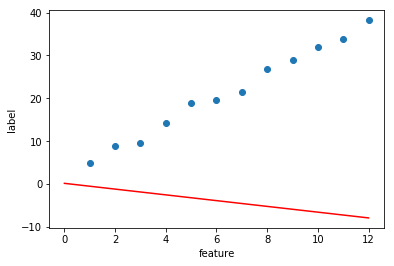

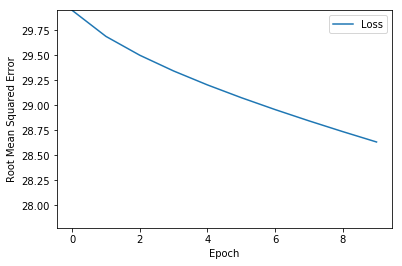

In [11]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/450
1/1 [==============================] - 4s 4s/step - loss: 345.8089 - root_mean_squared_error: 18.5959
Epoch 2/450
1/1 [==============================] - 0s 30ms/step - loss: 336.1790 - root_mean_squared_error: 18.3352
Epoch 3/450
1/1 [==============================] - 0s 47ms/step - loss: 329.3244 - root_mean_squared_error: 18.1473
Epoch 4/450
1/1 [==============================] - 0s 33ms/step - loss: 323.6624 - root_mean_squared_error: 17.9906
Epoch 5/450
1/1 [==============================] - 0s 36ms/step - loss: 318.6928 - root_mean_squared_error: 17.8520
Epoch 6/450
1/1 [==============================] - 0s 37ms/step - loss: 314.1839 - root_mean_squared_error: 17.7252
Epoch 7/450
1/1 [==============================] - 0s 29ms/step - loss: 310.0070 - root_mean_squared_error: 17.6070
Epoch 8/450
1/1 [==============================] - 0s 29ms/step - loss: 306.0821 - root_mean_squared_error: 17.4952
Epoch 9/450
1/1 [==============================] - 0s 30ms/step - loss: 30

1/1 [==============================] - 0s 32ms/step - loss: 151.7175 - root_mean_squared_error: 12.3174
Epoch 72/450
1/1 [==============================] - 0s 32ms/step - loss: 149.8078 - root_mean_squared_error: 12.2396
Epoch 73/450
1/1 [==============================] - 0s 38ms/step - loss: 147.9110 - root_mean_squared_error: 12.1619
Epoch 74/450
1/1 [==============================] - 0s 40ms/step - loss: 146.0271 - root_mean_squared_error: 12.0842
Epoch 75/450
1/1 [==============================] - 0s 27ms/step - loss: 144.1561 - root_mean_squared_error: 12.0065
Epoch 76/450
1/1 [==============================] - 0s 25ms/step - loss: 142.2979 - root_mean_squared_error: 11.9289
Epoch 77/450
1/1 [==============================] - 0s 31ms/step - loss: 140.4526 - root_mean_squared_error: 11.8513
Epoch 78/450
1/1 [==============================] - 0s 32ms/step - loss: 138.6201 - root_mean_squared_error: 11.7737
Epoch 79/450
1/1 [==============================] - 0s 36ms/step - loss: 136.

1/1 [==============================] - 0s 35ms/step - loss: 48.6769 - root_mean_squared_error: 6.9769
Epoch 142/450
1/1 [==============================] - 0s 38ms/step - loss: 47.6476 - root_mean_squared_error: 6.9027
Epoch 143/450
1/1 [==============================] - 0s 37ms/step - loss: 46.6305 - root_mean_squared_error: 6.8287
Epoch 144/450
1/1 [==============================] - 0s 41ms/step - loss: 45.6256 - root_mean_squared_error: 6.7547
Epoch 145/450
1/1 [==============================] - 0s 35ms/step - loss: 44.6329 - root_mean_squared_error: 6.6808
Epoch 146/450
1/1 [==============================] - 0s 48ms/step - loss: 43.6523 - root_mean_squared_error: 6.6070
Epoch 147/450
1/1 [==============================] - 0s 34ms/step - loss: 42.6839 - root_mean_squared_error: 6.5333
Epoch 148/450
1/1 [==============================] - 0s 32ms/step - loss: 41.7276 - root_mean_squared_error: 6.4597
Epoch 149/450
1/1 [==============================] - 0s 44ms/step - loss: 40.7834 - ro

1/1 [==============================] - 0s 27ms/step - loss: 4.8327 - root_mean_squared_error: 2.1983
Epoch 212/450
1/1 [==============================] - 0s 27ms/step - loss: 4.5904 - root_mean_squared_error: 2.1425
Epoch 213/450
1/1 [==============================] - 0s 26ms/step - loss: 4.3575 - root_mean_squared_error: 2.0875
Epoch 214/450
1/1 [==============================] - 0s 33ms/step - loss: 4.1338 - root_mean_squared_error: 2.0332
Epoch 215/450
1/1 [==============================] - 0s 26ms/step - loss: 3.9192 - root_mean_squared_error: 1.9797
Epoch 216/450
1/1 [==============================] - 0s 28ms/step - loss: 3.7137 - root_mean_squared_error: 1.9271
Epoch 217/450
1/1 [==============================] - 0s 32ms/step - loss: 3.5171 - root_mean_squared_error: 1.8754
Epoch 218/450
1/1 [==============================] - 0s 33ms/step - loss: 3.3292 - root_mean_squared_error: 1.8246
Epoch 219/450
1/1 [==============================] - 0s 35ms/step - loss: 3.1501 - root_mean_s

1/1 [==============================] - 0s 60ms/step - loss: 0.8757 - root_mean_squared_error: 0.9358
Epoch 283/450
1/1 [==============================] - 0s 59ms/step - loss: 0.8757 - root_mean_squared_error: 0.9358
Epoch 284/450
1/1 [==============================] - 0s 51ms/step - loss: 0.8756 - root_mean_squared_error: 0.9358
Epoch 285/450
1/1 [==============================] - 0s 68ms/step - loss: 0.8756 - root_mean_squared_error: 0.9357
Epoch 286/450
1/1 [==============================] - 0s 50ms/step - loss: 0.8756 - root_mean_squared_error: 0.9357
Epoch 287/450
1/1 [==============================] - 0s 73ms/step - loss: 0.8756 - root_mean_squared_error: 0.9357
Epoch 288/450
1/1 [==============================] - 0s 109ms/step - loss: 0.8756 - root_mean_squared_error: 0.9357
Epoch 289/450
1/1 [==============================] - 0s 106ms/step - loss: 0.8755 - root_mean_squared_error: 0.9357
Epoch 290/450
1/1 [==============================] - 0s 70ms/step - loss: 0.8755 - root_mean

1/1 [==============================] - 0s 47ms/step - loss: 0.8774 - root_mean_squared_error: 0.9367
Epoch 354/450
1/1 [==============================] - 0s 72ms/step - loss: 0.8769 - root_mean_squared_error: 0.9364
Epoch 355/450
1/1 [==============================] - 0s 68ms/step - loss: 0.8765 - root_mean_squared_error: 0.9362
Epoch 356/450
1/1 [==============================] - 0s 87ms/step - loss: 0.8762 - root_mean_squared_error: 0.9361
Epoch 357/450
1/1 [==============================] - 0s 46ms/step - loss: 0.8761 - root_mean_squared_error: 0.9360
Epoch 358/450
1/1 [==============================] - 0s 64ms/step - loss: 0.8761 - root_mean_squared_error: 0.9360
Epoch 359/450
1/1 [==============================] - 0s 71ms/step - loss: 0.8762 - root_mean_squared_error: 0.9360
Epoch 360/450
1/1 [==============================] - 0s 124ms/step - loss: 0.8763 - root_mean_squared_error: 0.9361
Epoch 361/450
1/1 [==============================] - 0s 57ms/step - loss: 0.8766 - root_mean_

1/1 [==============================] - 0s 67ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 425/450
1/1 [==============================] - 0s 53ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 426/450
1/1 [==============================] - 0s 60ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 427/450
1/1 [==============================] - 0s 63ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 428/450
1/1 [==============================] - 0s 80ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 429/450
1/1 [==============================] - 0s 56ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 430/450
1/1 [==============================] - 0s 61ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 431/450
1/1 [==============================] - 0s 49ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 432/450
1/1 [==============================] - 0s 36ms/step - loss: 0.8768 - root_mean_s

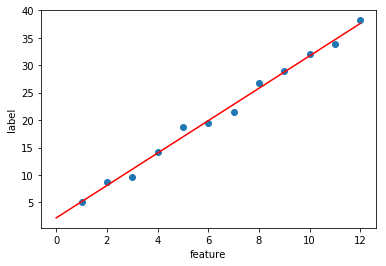

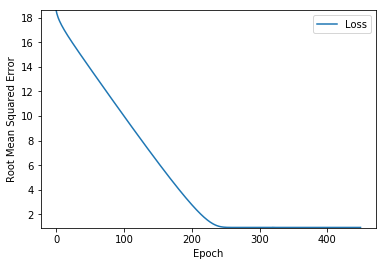

In [8]:
learning_rate=0.01
epochs=450
my_batch_size=12 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/500
1/1 [==============================] - 7s 7s/step - loss: 443.0273 - root_mean_squared_error: 21.0482
Epoch 2/500
1/1 [==============================] - 0s 58ms/step - loss: 6707313.5000 - root_mean_squared_error: 2589.8481
Epoch 3/500
1/1 [==============================] - 0s 71ms/step - loss: 439.7725 - root_mean_squared_error: 20.9708
Epoch 4/500
1/1 [==============================] - 0s 96ms/step - loss: 2.6218 - root_mean_squared_error: 1.6192
Epoch 5/500
1/1 [==============================] - 0s 65ms/step - loss: 0.9263 - root_mean_squared_error: 0.9624
Epoch 6/500
1/1 [==============================] - 0s 85ms/step - loss: 0.9007 - root_mean_squared_error: 0.9490
Epoch 7/500
1/1 [==============================] - 0s 53ms/step - loss: 0.8983 - root_mean_squared_error: 0.9478
Epoch 8/500
1/1 [==============================] - 0s 66ms/step - loss: 0.8967 - root_mean_squared_error: 0.9470
Epoch 9/500
1/1 [==============================] - 0s 72ms/step - loss: 0.8952 - ro

1/1 [==============================] - 0s 64ms/step - loss: 221985.3281 - root_mean_squared_error: 471.1532
Epoch 71/500
1/1 [==============================] - 0s 67ms/step - loss: 162159.8906 - root_mean_squared_error: 402.6908
Epoch 72/500
1/1 [==============================] - 0s 57ms/step - loss: 123240.2266 - root_mean_squared_error: 351.0559
Epoch 73/500
1/1 [==============================] - 0s 62ms/step - loss: 101396.1641 - root_mean_squared_error: 318.4276
Epoch 74/500
1/1 [==============================] - 0s 66ms/step - loss: 91971.6875 - root_mean_squared_error: 303.2683
Epoch 75/500
1/1 [==============================] - 0s 89ms/step - loss: 92267.5859 - root_mean_squared_error: 303.7558
Epoch 76/500
1/1 [==============================] - 0s 79ms/step - loss: 101541.0234 - root_mean_squared_error: 318.6550
Epoch 77/500
1/1 [==============================] - 0s 35ms/step - loss: 120317.7266 - root_mean_squared_error: 346.8685
Epoch 78/500
1/1 [=============================

1/1 [==============================] - 0s 80ms/step - loss: 173929.7656 - root_mean_squared_error: 417.0489
Epoch 138/500
1/1 [==============================] - 0s 66ms/step - loss: 172944.7812 - root_mean_squared_error: 415.8663
Epoch 139/500
1/1 [==============================] - 0s 76ms/step - loss: 171554.3750 - root_mean_squared_error: 414.1912
Epoch 140/500
1/1 [==============================] - 0s 50ms/step - loss: 170085.8281 - root_mean_squared_error: 412.4146
Epoch 141/500
1/1 [==============================] - 0s 60ms/step - loss: 168840.3281 - root_mean_squared_error: 410.9019
Epoch 142/500
1/1 [==============================] - 0s 47ms/step - loss: 168037.4531 - root_mean_squared_error: 409.9237
Epoch 143/500
1/1 [==============================] - 0s 71ms/step - loss: 167785.7031 - root_mean_squared_error: 409.6165
Epoch 144/500
1/1 [==============================] - 0s 31ms/step - loss: 168077.8281 - root_mean_squared_error: 409.9730
Epoch 145/500
1/1 [===================

1/1 [==============================] - 0s 77ms/step - loss: 170519.9531 - root_mean_squared_error: 412.9406
Epoch 205/500
1/1 [==============================] - 0s 82ms/step - loss: 170517.6250 - root_mean_squared_error: 412.9378
Epoch 206/500
1/1 [==============================] - 0s 66ms/step - loss: 170495.5000 - root_mean_squared_error: 412.9110
Epoch 207/500
1/1 [==============================] - 0s 55ms/step - loss: 170459.9844 - root_mean_squared_error: 412.8680
Epoch 208/500
1/1 [==============================] - 0s 76ms/step - loss: 170419.4844 - root_mean_squared_error: 412.8189
Epoch 209/500
1/1 [==============================] - 0s 95ms/step - loss: 170382.6875 - root_mean_squared_error: 412.7744
Epoch 210/500
1/1 [==============================] - 0s 60ms/step - loss: 170356.5469 - root_mean_squared_error: 412.7427
Epoch 211/500
1/1 [==============================] - 0s 48ms/step - loss: 170345.2344 - root_mean_squared_error: 412.7290
Epoch 212/500
1/1 [===================

1/1 [==============================] - 0s 77ms/step - loss: 170418.3594 - root_mean_squared_error: 412.8176
Epoch 271/500
1/1 [==============================] - 0s 72ms/step - loss: 170419.5781 - root_mean_squared_error: 412.8191
Epoch 272/500
1/1 [==============================] - 0s 54ms/step - loss: 170420.2812 - root_mean_squared_error: 412.8199
Epoch 273/500
1/1 [==============================] - 0s 43ms/step - loss: 170420.3125 - root_mean_squared_error: 412.8199
Epoch 274/500
1/1 [==============================] - 0s 83ms/step - loss: 170419.7656 - root_mean_squared_error: 412.8193
Epoch 275/500
1/1 [==============================] - 0s 74ms/step - loss: 170418.8906 - root_mean_squared_error: 412.8182
Epoch 276/500
1/1 [==============================] - 0s 100ms/step - loss: 170417.7500 - root_mean_squared_error: 412.8168
Epoch 277/500
1/1 [==============================] - 0s 62ms/step - loss: 170416.7656 - root_mean_squared_error: 412.8156
Epoch 278/500
1/1 [==================

1/1 [==============================] - 0s 48ms/step - loss: 170417.6875 - root_mean_squared_error: 412.8168
Epoch 338/500
1/1 [==============================] - 0s 82ms/step - loss: 170417.8438 - root_mean_squared_error: 412.8170
Epoch 339/500
1/1 [==============================] - 0s 45ms/step - loss: 170417.9531 - root_mean_squared_error: 412.8171
Epoch 340/500
1/1 [==============================] - 0s 42ms/step - loss: 170417.8594 - root_mean_squared_error: 412.8170
Epoch 341/500
1/1 [==============================] - 0s 68ms/step - loss: 170417.7969 - root_mean_squared_error: 412.8169
Epoch 342/500
1/1 [==============================] - 0s 71ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 343/500
1/1 [==============================] - 0s 66ms/step - loss: 170417.5000 - root_mean_squared_error: 412.8166
Epoch 344/500
1/1 [==============================] - 0s 78ms/step - loss: 170417.3906 - root_mean_squared_error: 412.8164
Epoch 345/500
1/1 [===================

1/1 [==============================] - 0s 67ms/step - loss: 170417.5156 - root_mean_squared_error: 412.8166
Epoch 405/500
1/1 [==============================] - 0s 49ms/step - loss: 170417.4062 - root_mean_squared_error: 412.8164
Epoch 406/500
1/1 [==============================] - 0s 48ms/step - loss: 170417.3125 - root_mean_squared_error: 412.8163
Epoch 407/500
1/1 [==============================] - 0s 65ms/step - loss: 170417.3594 - root_mean_squared_error: 412.8164
Epoch 408/500
1/1 [==============================] - 0s 45ms/step - loss: 170417.3594 - root_mean_squared_error: 412.8164
Epoch 409/500
1/1 [==============================] - 0s 55ms/step - loss: 170417.4062 - root_mean_squared_error: 412.8164
Epoch 410/500
1/1 [==============================] - 0s 71ms/step - loss: 170417.3750 - root_mean_squared_error: 412.8164
Epoch 411/500
1/1 [==============================] - 0s 79ms/step - loss: 170417.4375 - root_mean_squared_error: 412.8165
Epoch 412/500
1/1 [===================

1/1 [==============================] - 0s 82ms/step - loss: 170417.6719 - root_mean_squared_error: 412.8167
Epoch 472/500
1/1 [==============================] - 0s 48ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 473/500
1/1 [==============================] - 0s 72ms/step - loss: 170417.6562 - root_mean_squared_error: 412.8167
Epoch 474/500
1/1 [==============================] - 0s 76ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 475/500
1/1 [==============================] - 0s 99ms/step - loss: 170417.6562 - root_mean_squared_error: 412.8167
Epoch 476/500
1/1 [==============================] - 0s 46ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 477/500
1/1 [==============================] - 0s 50ms/step - loss: 170417.6562 - root_mean_squared_error: 412.8167
Epoch 478/500
1/1 [==============================] - 0s 50ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 479/500
1/1 [===================

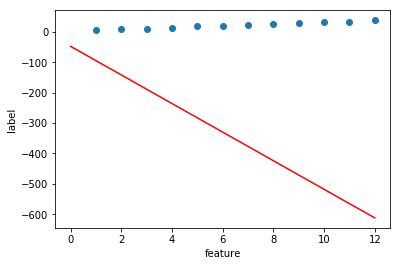

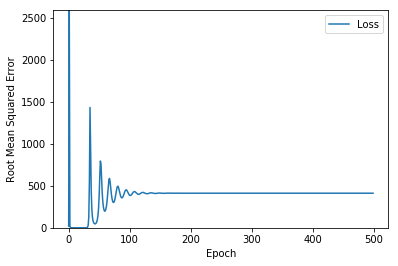

In [9]:
learning_rate=100 
epochs=500 
my_batch_size=12
my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)